## 0.Import

In [2]:
# ================================================================
# Complete reproduction of the paper: "Wine feature importance and quality prediction:
# A comparative study of machine learning algorithms with unbalanced data"
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Complete Implementation of the Paper: 'Wine feature importance and quality prediction'")
print("=" * 80)

Complete Implementation of the Paper: 'Wine feature importance and quality prediction'


## 1.Data Loading

In [4]:
# Step 1: Data Loading
print("\n1. Loading data...")

def load_wine_data(file_path):
    """
    Load wine quality data with proper handling of semicolon or comma separation
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()
    
    if ';' in first_line:
        return pd.read_csv(file_path, sep=';')
    else:
        return pd.read_csv(file_path)

try:
    red_wine = load_wine_data('wine+quality/winequality-red.csv')
    print(f"Red wine dataset loaded: {red_wine.shape[0]} rows and {red_wine.shape[1]} columns")
except Exception as e:
    print(f"Error loading red wine dataset: {e}")
    exit(1)


print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


1. Loading data...
Red wine dataset loaded: 1599 rows and 12 columns
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

  

## 2.Data preprocessing (based on section 3.2 of the paper)

In [7]:
# Remove duplicates
initial_rows = red_wine.shape[0]
red_wine = red_wine.drop_duplicates()
removed_duplicates = initial_rows - red_wine.shape[0]
print(f"  Removed {removed_duplicates} duplicate entries")

# Remove missing values
missing_values = red_wine.isnull().sum().sum()
red_wine = red_wine.dropna()
print(f"  Processed {missing_values} missing values")

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


  Removed 240 duplicate entries
  Processed 0 missing values
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol 

## 3.Feature selection (excluding residual sugar as per the paper)

In [9]:
# Step 3: Feature selection (excluding residual sugar as per the paper)
print("\n3. Feature selection...")
correlation_matrix = red_wine.corr()
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation with quality:")
print(quality_correlation)


# Select all features except residual sugar (as per the paper)
selected_features = [col for col in red_wine.columns if col != 'residual sugar' and col != 'quality']
print("\nSelected features:")
print(selected_features)



3. Feature selection...
Correlation with quality:
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

Selected features:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Step 4: Quality categorization (based on section 3.2 of the paper)

Wine category distribution:
quality_category
0      63
1    1112
2     184
Name: count, dtype: int64


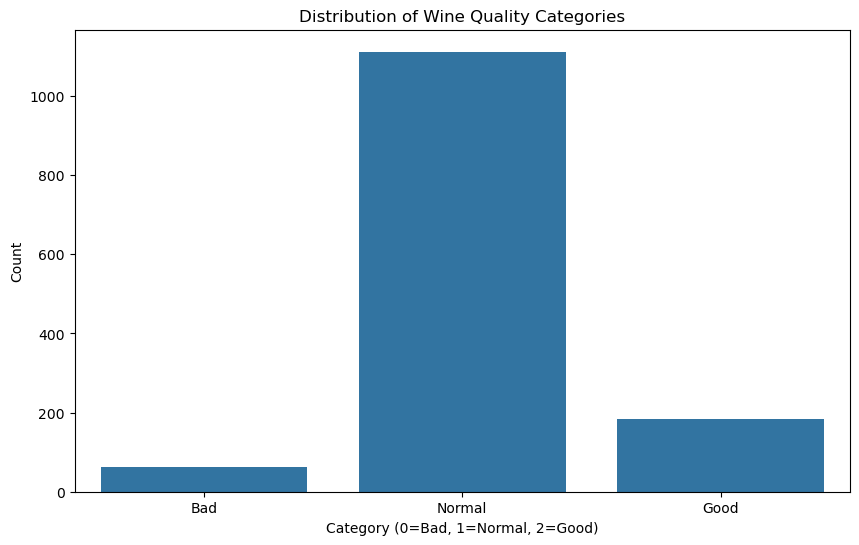

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_category  
0      9.4        5             

In [105]:
def encode_quality(quality):
    """
    Encode wine quality into categories as specified in the paper:
    - Bad wine: quality < 5
    - Normal wine: 5 <= quality <= 6
    - Good wine: 7 <= quality <= 10
    """
    if quality < 5:
        return 0  # Bad wine
    elif 5 <= quality <= 6:
        return 1  # Normal wine
    else:  # quality >= 7
        return 2  # Good wine

red_wine['quality_category'] = red_wine['quality'].apply(encode_quality)

# Check distribution after encoding
category_counts = red_wine['quality_category'].value_counts().sort_index()
print("Wine category distribution:")
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_category', data=red_wine)
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Category (0=Bad, 1=Normal, 2=Good)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Bad', 'Normal', 'Good'])
plt.show('wine_quality_categories.png')
plt.close()

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


## Step 5: Data standardization & Step 6: Train-test split

In [137]:
# Checking excluding column(residual sugar)
print("\nColumn name:")
print(red_wine[selected_features].columns.tolist())


# Step 5: Data standardization
X = red_wine[selected_features]
y = red_wine['quality_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Step 6: Train-test split
print("\n6. Train-test split...")
# ==============================================================
# ==================YOU CAN USE THIS TEST MODEL==================
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"  Training data: {X_train.shape[0]} samples")
print(f"  Test data: {X_test.shape[0]} samples")




Column name:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

6. Train-test split...
  Training data: 1087 samples
  Test data: 272 samples


## Step 7: Apply SMOTE (key contribution of the paper)


7. Handling imbalanced data with SMOTE...
  Class distribution before SMOTE:
quality_category
0     50
1    890
2    147
Name: count, dtype: int64
  Class distribution after SMOTE:
quality_category
0    200
1    890
2    200
Name: count, dtype: int64
  Original training data: 1087 samples
  Training data after SMOTE: 1290 samples


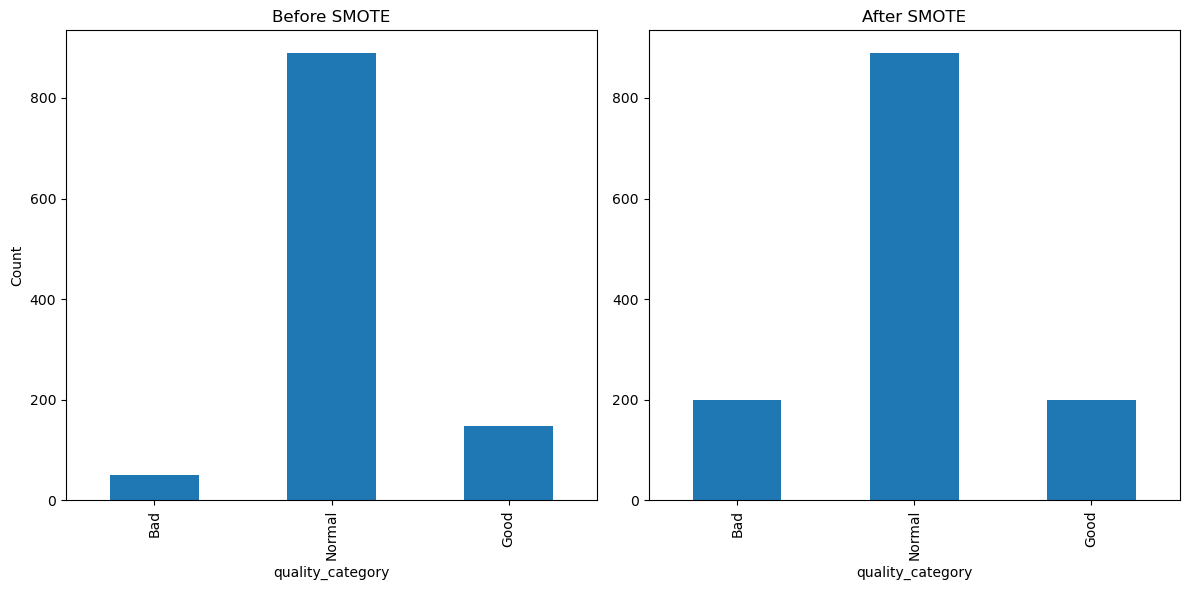

  ####################:


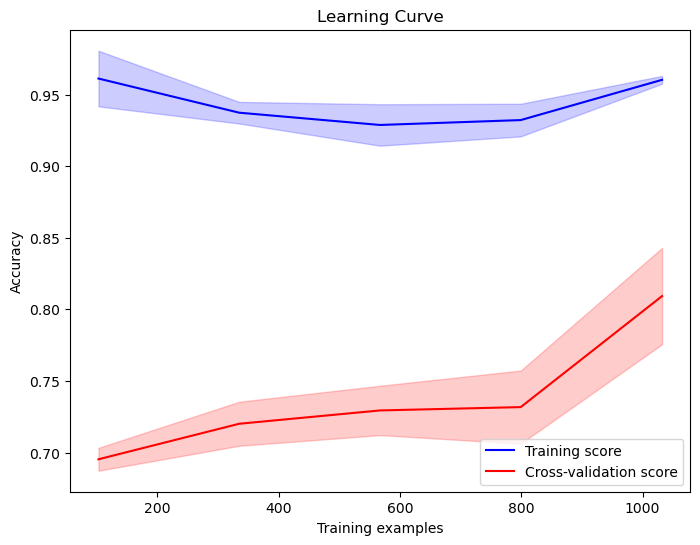

In [139]:
# Step 7: Apply SMOTE (key contribution of the paper)
print("\n7. Handling imbalanced data with SMOTE...")
print("  Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts().sort_index())

# smote = SMOTE(sampling_strategy={0: 300, 2: 300}, random_state=42)
smote = SMOTE(sampling_strategy={0: 200, 2: 200}, random_state=42)

# smote = SMOTE(random_state=42)
# ==============================================================
# ==================YOU CAN USE THIS TRAIN MODEL==================
# ==============================================================
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("  Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

print(f"  Original training data: {X_train.shape[0]} samples")
print(f"  Training data after SMOTE: {X_train_balanced.shape[0]} samples")

# Visualize class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pd.Series(y_train).value_counts().sort_index().plot(
    kind='bar', ax=ax[0], title='Before SMOTE'
)
ax[0].set_xticklabels(['Bad', 'Normal', 'Good'])
ax[0].set_ylabel('Count')

pd.Series(y_train_balanced).value_counts().sort_index().plot(
    kind='bar', ax=ax[1], title='After SMOTE'
)
ax[1].set_xticklabels(['Bad', 'Normal', 'Good'])
plt.tight_layout()
plt.show('smote_comparison.png')
plt.close()

print("  ####################:")
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_balanced, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy"
)

# 平均と標準偏差を取得
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


Training Accuracy: 0.9868
Test Accuracy: 0.8162


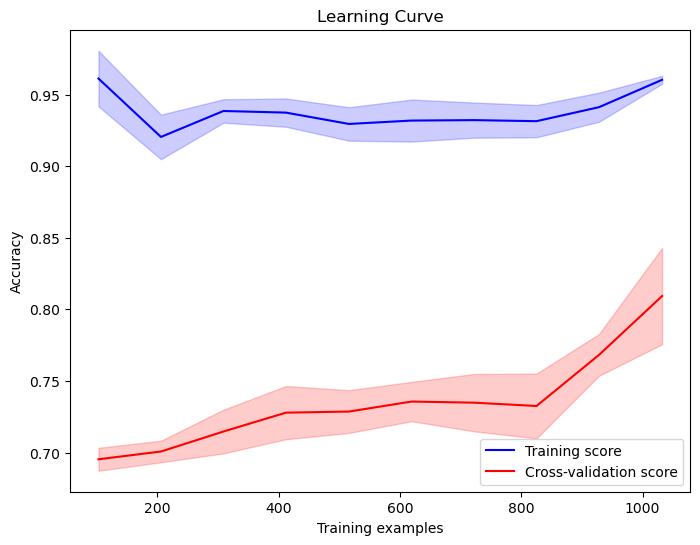

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. 訓練データとテストデータでのAccuracyを比較
# -------------------------------

# 訓練データでの予測と正解率
train_pred = best_rf_balanced.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, train_pred)

# テストデータでの予測と正解率
test_pred = best_rf_balanced.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 簡易的な過学習チェック（例として、訓練とテストの差が10%以上なら過学習の可能性）
if train_accuracy - test_accuracy > 0.1:
    print("Warning: The model may be overfitting.")
else:
    print("The model does not appear to be significantly overfitting.")

# -------------------------------
# 2. Learning Curveによる可視化
# -------------------------------
# StratifiedKFoldで層化サンプリングを行い、各クラスが均等に分布するようにする
cv = StratifiedKFold(n_splits=5)
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_balanced, 
    X_train_balanced, 
    y_train_balanced, 
    cv=cv, 
    scoring="accuracy",
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# 平均と標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 学習曲線の描画
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


## Random Forest

In [143]:
# Comparing Random Forest performance with and without SMOTE

print("\n# Random Forest Comparison: Original vs SMOTE-Balanced training")

# Common hyperparameter grid for both models
rf_param_grid = {
    'n_estimators': [200, 200],
    'max_depth': [20, 20, 20],
    'min_samples_split': [10, 10, 10]
}

# 1. Train RF with original imbalanced data
print("\n1. Training Random Forest with original imbalanced data")

rf_original = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    rf_param_grid, 
    cv=5, 
    n_jobs=-1
)
rf_original.fit(X_train, y_train)

print(f"  Best parameters: {rf_original.best_params_}")
best_rf_original = rf_original.best_estimator_

# Evaluate on test data
y_pred_original = best_rf_original.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)
print(f"  Accuracy: {original_accuracy:.4f}")

print("\n  Classification Report (Original Training Data):")
original_report = classification_report(y_test, y_pred_original)
print(original_report)

# Create confusion matrix for original model
plt.figure(figsize=(8, 6))
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RF with Original Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.yticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.savefig('rf_confusion_matrix_original.png')
plt.close()

# 2. Train RF with SMOTE-balanced data
print("\n2. Training Random Forest with SMOTE-balanced data")

rf_balanced = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    rf_param_grid, 
    cv=5, 
    n_jobs=-1
)
rf_balanced.fit(X_train_balanced, y_train_balanced)

print(f"  Best parameters: {rf_balanced.best_params_}")
best_rf_balanced = rf_balanced.best_estimator_

# Evaluate on test data
y_pred_balanced = best_rf_balanced.predict(X_test)
balanced_accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"  Accuracy: {balanced_accuracy:.4f}")

print("\n  Classification Report (SMOTE-Balanced Training Data):")
balanced_report = classification_report(y_test, y_pred_balanced)
print(balanced_report)

# Create confusion matrix for balanced model
plt.figure(figsize=(8, 6))
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RF with SMOTE-Balanced Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.yticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.savefig('rf_confusion_matrix_balanced.png')
plt.close()

# 3. Compare the results
print("\n3. Performance Comparison")
comparison = {
    'Model': ['RF (Original Data)', 'RF (SMOTE-Balanced)'],
    'Accuracy': [original_accuracy, balanced_accuracy],
    'Improvement': ['baseline', f"{(balanced_accuracy - original_accuracy) * 100:.2f}%"]
}

# Calculate per-class metrics for both models
original_report_dict = classification_report(y_test, y_pred_original, output_dict=True)
balanced_report_dict = classification_report(y_test, y_pred_balanced, output_dict=True)

for class_idx in ['0', '1', '2']:
    class_name = ['Bad', 'Normal', 'Good'][int(class_idx)]
    comparison[f'{class_name} F1-score'] = [
        original_report_dict[class_idx]['f1-score'],
        balanced_report_dict[class_idx]['f1-score']
    ]
    comparison[f'{class_name} Recall'] = [
        original_report_dict[class_idx]['recall'],
        balanced_report_dict[class_idx]['recall']
    ]

# Print comparison table
comparison_df = pd.DataFrame(comparison)
print("\nPerformance Comparison Table:")
print(comparison_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Create bar chart comparing class-specific F1 scores
class_names = ['Bad', 'Normal', 'Good']
original_f1 = [original_report_dict[str(i)]['f1-score'] for i in range(3)]
balanced_f1 = [balanced_report_dict[str(i)]['f1-score'] for i in range(3)]

x = np.arange(len(class_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, original_f1, width, label='Original Training Data')
ax.bar(x + width/2, balanced_f1, width, label='SMOTE-Balanced Training Data')

ax.set_title('F1-Score Comparison by Wine Quality Class')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Wine Quality Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on the bars
for i, v in enumerate(original_f1):
    ax.text(i - width/2, v + 0.02, f'{v:.2f}', ha='center')
for i, v in enumerate(balanced_f1):
    ax.text(i + width/2, v + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.savefig('rf_f1_score_comparison.png')
plt.close()

print("\nComparison charts saved to 'rf_f1_score_comparison.png'")
print("Confusion matrices saved to 'rf_confusion_matrix_original.png' and 'rf_confusion_matrix_balanced.png'")



# Random Forest Comparison: Original vs SMOTE-Balanced training

1. Training Random Forest with original imbalanced data
  Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
  Accuracy: 0.8382

  Classification Report (Original Training Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.97      0.91       222
           2       0.68      0.35      0.46        37

    accuracy                           0.84       272
   macro avg       0.51      0.44      0.46       272
weighted avg       0.79      0.84      0.80       272


2. Training Random Forest with SMOTE-balanced data
  Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
  Accuracy: 0.8456

  Classification Report (SMOTE-Balanced Training Data):
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.87 